In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [179]:
df = pd.read_csv('data.csv')
class LR:
    def __init__(self,X,y, mode = 'LR'):
        self.X, self.y, self.mode  = X, y, mode
        if mode == 'SLR':
            self.w = self.SLR()
            self.pred = self.yhat(X,self.w)
            self.error = self.mse(self.pred,y)
        elif mode == 'sk-SLR':
            from sklearn.linear_model import LinearRegression
            regr = LinearRegression()
            regr.fit(X, y)
            self.w = regr.coef_
            self.pred = regr.predict(X)
            self.error = self.mse(self.pred,y)
        elif mode =='SGD':
            self.Costs, self.error, self.w = self.SGD([0,0],0.01,5)
        elif mode == 'sk-SGD':
            from sklearn.linear_model import SGDRegressor
            SGDR = SGDRegressor(alpha=1,max_iter=60, learning_rate='constant',eta0 = 0.01)
            SGDR.fit(X,y)
            self.pred = SGDR.predict(X)
            self.w = SGDR.coef_
            self.error = self.rmse(self.pred,y)
    
    yhat = lambda self,X,w : w[0] + w[1]*X
    mse = lambda self,yhat,y: np.mean((yhat-y)**2)
    rmse = lambda self,yhat,y: np.sqrt(np.mean((yhat-y)**2))
    def SLR(self):
        X = self.X
        y = self.y
        X2 = np.square(X)
        n = len(X)
        sX = np.sum(X)
        sY = np.sum(y)
        xy = np.multiply(X,y)
        a = ((np.sum(X2)*sY) - (sX*np.sum(xy)))/(n*np.sum(X2) - np.square(sX))
        b = (n*np.sum(xy) - sX*sY) /(n*np.sum(X2) - np.square(sX))
        return (a,b)
    
    def SGD(self, weights, alpha, epochs):
        Costs = [] 
        for _ in range(epochs):   
            hypo = self.yhat(X,weights)
            weights[0], weights[1] = weights[0] - 2*alpha*sum((hypo-y)*X/len(X)), weights[1] - 2*alpha*sum(hypo-y)
            cost = self.rmse(hypo, y)
            Costs.append(cost)
        return Costs, cost, weights

In [153]:
X = np.array(df['salary']).reshape(-1,1)
y =  np.array(df[' experience']).reshape(-1,1)
a = LR(X,y, 'SLR')
w = [(1.1,0.1), (1.1,1.5), (1.1,0.8)]
mse =[]
for weight in w:
    mse += [a.mse(a.yhat(a.X,weight), a.y)]

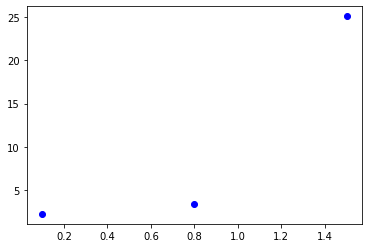

In [154]:
plt.scatter([0.1,1.5,0.8], mse, color = 'b')

In [155]:
print(a.mode)
beta= np.arange(0,1.51,0.01)
mse = []
for b in beta:
    mse += [a.mse(a.yhat(a.X,[b, a.w[1]]), a.y)]

SLR


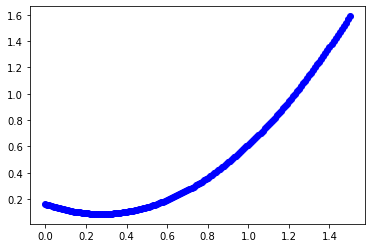

In [156]:
plt.scatter(beta, mse, color = 'b')

In [157]:
mse =[]
for b in beta:
    mse += [a.mse(a.yhat(a.X,[a.w[0],b ]), a.y)]

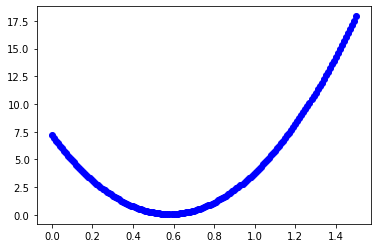

In [158]:
plt.scatter(beta, mse, color = 'b')

In [169]:
print(LR(X,y,'SLR').error - LR(X,y,'sk-SLR').error)

5.551115123125783e-17


In [174]:
a = LR(X,y,'SGD')

0.2943269015726913


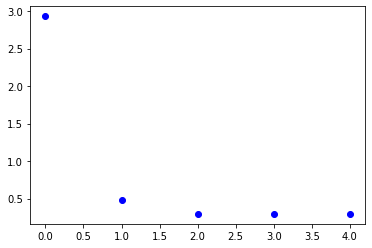

In [175]:
xax = range(0,5)
print(a.error)
plt.scatter(xax,a.Costs, color='b')

In [181]:
a = LR(X,y,'sk-SGD')
a.error

/home/student/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1.3523458821991667